In [12]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('CrimeAnalysis').getOrCreate()

## Import datasets

In [13]:
#import crime data and print schema
df_crime = spark.read.csv('./Datasets/Crimes_-_2012.csv', header = True, inferSchema = True)
df_crime.printSchema()
print(df_crime.columns)

#import census data and print schema
df_census = spark.read.csv('./Datasets/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv',
                          header = True, inferSchema = True)
df_census.printSchema()
print(df_census.columns)

root
 |-- Case Number: string (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- TIME: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)

['Case Number', 'ID', 'Date', 'TIME', 'IUCR', 'Primary Type', 'Description', 'Location Descriptio

## Explorer the data

In [14]:
# Import pandas.
import pandas as pd

# Take the first five rows of crime data, and visualise.
pd.DataFrame(df_crime.take(5), columns = df_crime.columns)

,Case Number,ID,Date,TIME,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,FBI Code,X Coordinate,Community Area,Y Coordinate,Year,Latitude,Updated On,Longitude,Location
0,HZ170962,10433096,1/01/12,12:00:00 AM,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,...,29,17,None,19,None,2012,None,5/11/16 15:48,None,None
1,HZ170983,10433124,1/01/12,12:00:00 AM,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,29,17,None,19,None,2012,None,5/11/16 15:48,None,None
2,JB147078,11227247,1/01/12,9:00:00 AM,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,10,11,None,52,None,2012,None,2/11/18 15:57,None,None
3,JB149037,11228588,4/06/12,12:00:00 PM,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,18,11,None,70,None,2012,None,2/12/18 15:49,None,None
4,JB169720,11244255,1/01/12,12:01:00 AM,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,31,17,None,19,None,2012,None,3/02/18 15:54,None,None


In [15]:
# Take the first five rows of census data, and visualise.
pd.DataFrame(df_census.take(5), columns = df_census.columns)

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


## Verify the data quality

In [16]:
# Generating summary statistics for crime data, and converting to a Pandas DataFrame.
df_crime.describe().toPandas()

,summary,Case Number,ID,Date,TIME,IUCR,Primary Type,Description,Location Description,Beat,...,Ward,FBI Code,X Coordinate,Community Area,Y Coordinate,Year,Latitude,Updated On,Longitude,Location
0,count,335881,335882,335882,335882,335882,335882,335882,335506,335882,...,335875,335882,335426,335856,335426,335882,335426,335882,335426,335426
1,mean,342624.8,8685288.95696703,None,None,1092.0595758438667,None,None,None,1164.1396085530037,...,22.832925939709714,11.711842572676632,1164532.3010231764,37.602945905388026,1885423.3761872961,2012.0,41.8411970296055,None,-87.67175084614298,None
2,stddev,115867.13483425746,381750.2318913922,None,None,765.6293334736196,None,None,None,694.4503023566839,...,13.784368258262678,7.231356670546839,17717.545921822,21.56169954649405,33479.45196363734,0.0,0.09215121299487906,None,0.06396285094973082,None
3,min,223432,20224,1/01/12,10:00:00 AM,031A,ARSON,$500 AND UNDER,ABANDONED BUILDING,111,...,1,01A,0,0,0,2012,36.6194464,01/13/2017 03:52:31 PM,-91.68656568,"(36.619446395, -91.686565684)"
4,max,VV591657,11399807,9/12/12,9:59:16 PM,937,WEAPONS VIOLATION,VIOLATION OF STALKING NO CONTACT ORDER,YARD,2535,...,50,9,1205119,77,1951527,2012,42.02258582,9/11/17 15:50,-87.52452938,"(42.022585817, -87.666121381)"


In [17]:
# Generating summary statistics for census data, and converting to a Pandas DataFrame.
df_census.describe().toPandas()

,summary,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,count,77,78,78,78,78,78,78,78,77
1,mean,39.0,None,4.920512820512823,21.739743589743597,15.341025641025643,20.33076923076923,35.71794871794873,25597.0,49.506493506493506
2,stddev,22.371857321197094,None,3.6589814413502,11.457230912971083,7.49949670860991,11.746514351100048,7.284421084944951,15196.405541331917,28.69055565156158
3,min,1,Albany Park,0.3,3.3,4.7,2.5,13.5,8201,1
4,max,77,Woodlawn,15.8,56.5,35.9,54.8,51.5,88669,98


## Clean the data

In [18]:
# Drop only if NaN in “Community Area” for the crime dataset
df_crime_clean = df_crime.dropna(subset=['Community Area'])

# comparing sizes of data frames 
print("Old crime data frame length:", df_crime.count(), "\nNew crime data frame length:",  
       df_crime_clean.count())

# Drop only if NaN in “Community Area Number” for the census dataset
df_census_clean = df_census.dropna(subset=['Community Area Number'])

# comparing sizes of data frames 
print("Old census data frame length:", df_census.count(), "\nNew census data frame length:",  
       df_census_clean.count())

Old crime data frame length: 335882 
New crime data frame length: 335856
Old census data frame length: 78 
New census data frame length: 77


## Counstruct the data - Derive new columns

In [19]:
import pyspark.sql.functions as f

# Extract month from "Date"
split_col = f.split(df_crime_clean['Date'], '/')

df_crime_clean = df_crime_clean.withColumn('Day', split_col.getItem(0))

df_crime_clean = df_crime_clean.withColumn('Month', split_col.getItem(1))

# Extract Hour from "TIME"
df_crime_clean = df_crime_clean.withColumn("Hour", 
                            f.from_unixtime(f.unix_timestamp("TIME",'hh:mm:ss aa'),'HH'))

# Verify the results
pd.DataFrame(df_crime_clean.select('Date', 'TIME', 'Day', 'Month', 'Hour').take(15),
             columns = ['Date', 'TIME', 'Day', 'Month', 'Hour'])



,Date,TIME,Day,Month,Hour
0,1/01/12,12:00:00 AM,1,01,00
1,1/01/12,12:00:00 AM,1,01,00
2,1/01/12,9:00:00 AM,1,01,09
3,4/06/12,12:00:00 PM,4,06,12
4,1/01/12,12:01:00 AM,1,01,00
5,6/08/12,12:01:00 AM,6,08,00
6,1/01/12,12:01:00 AM,1,01,00
7,1/01/12,12:01:00 AM,1,01,00
8,10/01/12,12:00:00 AM,10,01,00
9,13/04/12,12:00:00 AM,13,04,00


## Counstruct the data - Aggregation

In [20]:
# Register DataFrame as SQL View
df_crime_clean.createOrReplaceTempView('tb_crime_clean')
df_census_clean.createOrReplaceTempView('tb_census_clean')

# Aggregate crime data by month for analysis 
df_crime_month = spark.sql("SELECT Month, `Primary Type` CrimeType, count(*) RecordCount " + 
                           "FROM tb_crime_clean GROUP BY Month,`Primary Type` ")

# Aggregate crime data by Community Area for analysis 
df_crime_community = spark.sql("SELECT t2.`COMMUNITY AREA NAME` Community, t1.`Primary Type` CrimeType, count(*) RecordCount " + 
                               "FROM tb_crime_clean t1, tb_census_clean t2 " + 
                               "WHERE t1.`Community Area` = t2.`Community Area Number` " + 
                               "GROUP BY t2.`COMMUNITY AREA NAME`, t1.`Primary Type` ")

# Aggregate crime data by Hour and merge with the census data for building model 
df_crime_model = spark.sql("SELECT Day, Hour, `Primary Type` CrimeType, `Community Area` CommunityArea, count(*) RecordCount " + 
                               "FROM tb_crime_clean " + 
                               "GROUP BY Day, Hour, `Primary Type`, `Community Area`")

df_join = df_crime_model.join(df_census_clean, 
                              df_crime_model.CommunityArea == df_census_clean["Community Area Number"],
                              "left_outer")

pd.DataFrame(df_join.take(5), columns = df_join.columns)


,Day,Hour,CrimeType,CommunityArea,RecordCount,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,14,12,BATTERY,3,1,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
1,1,16,BATTERY,73,2,73,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48
2,11,13,BURGLARY,53,3,53,West Pullman,3.3,25.9,19.4,20.5,42.1,16563,62
3,18,20,THEFT,32,6,32,Loop,1.5,14.7,5.7,3.1,13.5,65526,3
4,20,13,THEFT,1,2,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39


## Data Transformation - Reduce the data

In [21]:
# Select crime type of "THEFT" to build the predition model
df_theft = df_join.where(df_join['CrimeType'] == "THEFT")

# Generating summary statistics for THEFT data
df_theft.describe().toPandas()


,summary,Day,Hour,CrimeType,CommunityArea,RecordCount,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,count,31824,31824,31824,31824,31824,31824,31824,31824,31824,31824,31824,31824,31824,31824
1,mean,15.820512820512821,12.469582704876823,None,37.50622171945702,2.3709150326797386,37.50622171945702,None,4.976046380090495,22.300722724987438,15.290491452991457,19.91188097033686,34.41386375062848,27109.430492709904,48.62958773252891
2,stddev,8.871037563771091,6.5500295012768035,None,22.533624205709206,2.1495900003932538,22.533624205709206,None,3.6916016701224343,10.496286205793057,7.519316591929637,11.827952218828393,7.997774733942049,17503.675042684095,29.38338306266172
3,min,1,00,THEFT,1,1,1,Albany Park,0.3,3.3,4.7,2.5,13.5,8201,1
4,max,9,23,THEFT,77,40,77,Woodlawn,15.8,56.5,35.9,54.8,51.5,88669,98


## Data Transformation - Project the data

In [22]:
# Derive a new flag "IsCrimeHigh" as the target of prediction
from pyspark.sql.functions import udf

IsCrimeHigh = udf(lambda RecordCount: "1" if RecordCount >=5 else "0")

df_theft = df_theft.withColumn("IsCrimeHigh", IsCrimeHigh(df_theft.RecordCount))

pd.DataFrame(df_theft.take(5), columns = df_theft.columns)


,Day,Hour,CrimeType,CommunityArea,RecordCount,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,IsCrimeHigh
0,18,20,THEFT,32,6,32,Loop,1.5,14.7,5.7,3.1,13.5,65526,3,1
1,20,13,THEFT,1,2,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,0
2,6,09,THEFT,66,2,66,Chicago Lawn,7.6,27.9,17.1,31.2,40.6,13231,80,0
3,12,00,THEFT,69,5,69,Greater Grand Crossing,3.6,29.6,23.0,16.5,41.0,17285,66,1
4,24,12,THEFT,62,1,62,West Elsdon,11.1,15.6,16.7,37.0,37.7,15754,69,0


In [23]:
# Find out how many data points we have for each class
df_theft.groupby('IsCrimeHigh').count().toPandas()

,IsCrimeHigh,count
0,0,28334
1,1,3490


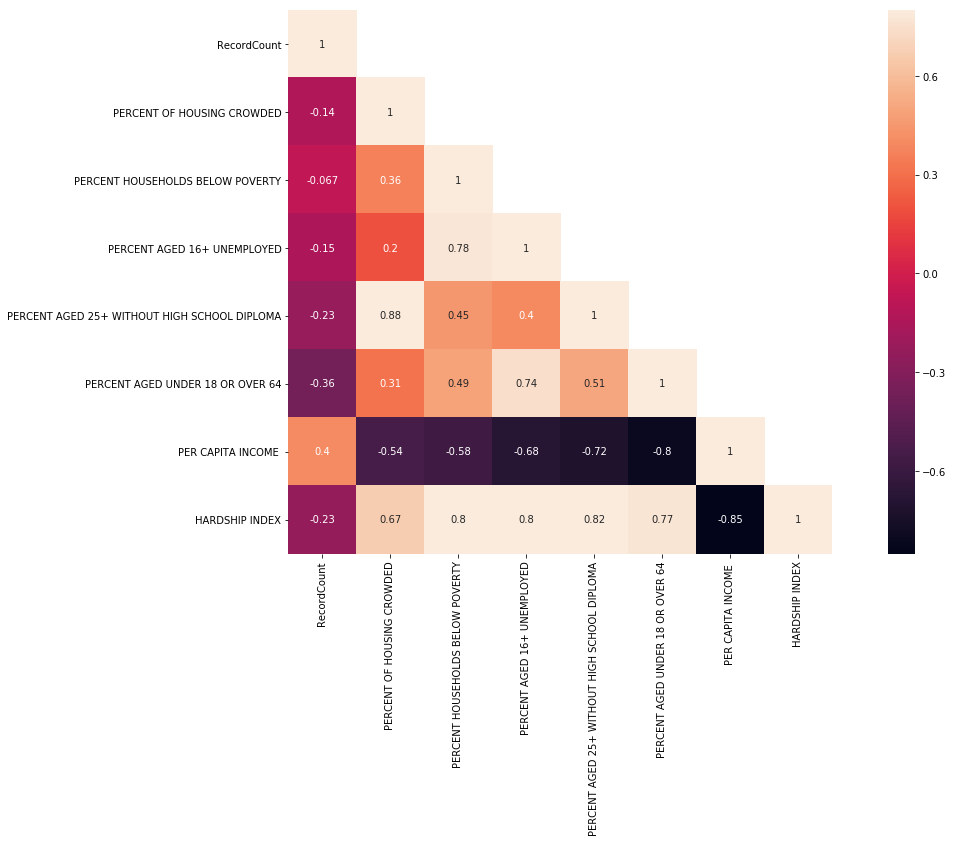

In [24]:
# Feature selection 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#df_theft.toPandas()
corrMatt = df_theft.toPandas()[["RecordCount","PERCENT OF HOUSING CROWDED",
                     "PERCENT HOUSEHOLDS BELOW POVERTY","PERCENT AGED 16+ UNEMPLOYED",
                     "PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA",
                     "PERCENT AGED UNDER 18 OR OVER 64",
                     "PER CAPITA INCOME ", "HARDSHIP INDEX"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20, 10)
sn.heatmap(corrMatt, mask = mask, vmax = 0.8, square = True, annot = True)


## Data mining - Select the relevant features

In [14]:
df = df_theft.select('Day', 'Hour', 'CommunityArea', 'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ', 'IsCrimeHigh')
df.printSchema()

root
 |-- Day: string (nullable = true)
 |-- Hour: string (nullable = true)
 |-- CommunityArea: integer (nullable = true)
 |-- PERCENT AGED UNDER 18 OR OVER 64: double (nullable = true)
 |-- PER CAPITA INCOME : integer (nullable = true)
 |-- IsCrimeHigh: string (nullable = true)



In [15]:
# Convert String columns to int
from pyspark.sql.types import IntegerType

df = df.withColumn("Day", df["Day"].cast(IntegerType()))
df = df.withColumn("Hour", df["Hour"].cast(IntegerType()))
df = df.withColumn("label", df["IsCrimeHigh"].cast(IntegerType()))
df.printSchema()

root
 |-- Day: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- CommunityArea: integer (nullable = true)
 |-- PERCENT AGED UNDER 18 OR OVER 64: double (nullable = true)
 |-- PER CAPITA INCOME : integer (nullable = true)
 |-- IsCrimeHigh: string (nullable = true)
 |-- label: integer (nullable = true)



In [16]:
# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

# Using vector assembler to turn all of these columns into one column (named features).
vector_assembler = VectorAssembler(inputCols=['Day','Hour','CommunityArea','PERCENT AGED UNDER 18 OR OVER 64',
                                       'PER CAPITA INCOME '], outputCol="features")

vector_output = vector_assembler.transform(df)
vector_output = vector_output.select(['features', 'label'])


## Data mining - Split Data

In [17]:
# Split our data. Note that the new DataFrame is being used.
train_data, test_data = vector_output.randomSplit([0.7,0.3], seed = 722)
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 22262
Test Dataset Count: 9562


## Models - Logistic Regression Model


In [18]:
from pyspark.ml.classification import LogisticRegression

# Instantiate the model.
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label',
                        aggregationDepth = 8)

# Fit the model.
lr_model = lr.fit(train_data)

# And evaluate the model using the test data.
lr_results = lr_model.evaluate(test_data)
lr_results.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[1.0,17.0,39.0,35...|    0|[2.00716470472445...|[0.88154727604175...|       0.0|
|[2.0,2.0,10.0,39....|    0|[2.78242792548086...|[0.94171884284491...|       0.0|
|[2.0,14.0,60.0,31...|    0|[2.32959767087176...|[0.91129882054324...|       0.0|
|[3.0,3.0,16.0,31....|    0|[2.50596176599970...|[0.92455870654407...|       0.0|
|[3.0,10.0,24.0,21...|    1|[1.29116780825905...|[0.78434478724989...|       0.0|
|[4.0,6.0,42.0,36....|    0|[2.95428008557956...|[0.95046538782964...|       0.0|
|[4.0,6.0,55.0,42....|    0|[3.23496203744747...|[0.96212896894961...|       0.0|
|[5.0,12.0,21.0,31...|    0|[2.38415879100451...|[0.91561132841508...|       0.0|
|[5.0,18.0,52.0,42...|    0|[2.96083280733219...|[0.95077298702833...|       0.0|
|[6.0,7.0,60.0,3

## Model Evaluation - Logistic Regression Model

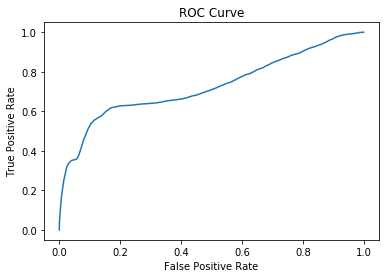

Traning set -LR- Area Under ROC: 0.7261306395392174


In [19]:
# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic for Traning set. 
print('Traning set -LR- Area Under ROC: ' + str(training_summary.areaUnderROC))

In [20]:
# Print the AUC statistic for Testing set. 
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Testing set -LR- Area Under ROC', evaluator.evaluate(lr_results.predictions))

Testing set -LR- Area Under ROC 0.7496965478089267


In [21]:
# Define plot_confusion_matrix function for ploting confusion matrix
def plot_confusion_matrix(predictions):
    " This function plots the confusion matrix."   
    cm = predictions.groupby(['label', 'prediction']).count().toPandas()
    true_pos = cm[(cm['label'] == 1) & (cm['prediction'] == 1)]['count'].values[0]
    false_pos = cm[(cm['label'] == 1) & (cm['prediction'] == 0)]['count'].values[0]
    true_neg = cm[(cm['label'] == 0) & (cm['prediction'] == 0)]['count'].values[0]
    false_neg = cm[(cm['label'] == 0) & (cm['prediction'] == 1)]['count'].values[0]
    count_pos = true_pos + false_pos
    count_neg = true_neg + false_neg

    array = [[round(true_neg / count_neg, 4) * 100, round(false_neg / count_neg, 4) * 100],
             [round(false_pos / count_pos, 4) * 100, round(true_pos / count_pos, 4) * 100]]        
    df_cm = pd.DataFrame(array, ["Label 0", "Label 1"],
                      ["Predicted 0", "Predicted 1"])

    sn.set(font_scale = 1.4)
    sn.heatmap(df_cm, annot = True, fmt='.2f', annot_kws = {"size": 16})

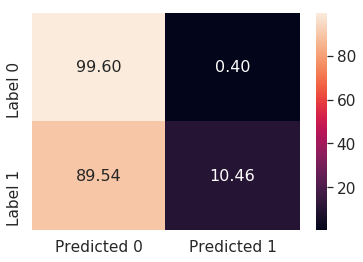

In [22]:
plot_confusion_matrix(lr_results.predictions)

## Tuning parameters - Logistic Regression

In [24]:
print(lr.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
maxIter: max number of iterations (>= 0). (default: 100)
predictionCol: prediction column name. (default: prediction)
probabilityCol: Column name for predicted class conditional probabilities. Note: Not all models output well-calibrated probability estimates! These probabilities should be treated as confidences, not precise probabilities. (default: probability)
rawPredictionCol: raw prediction (a.

## Models - Decision Tree Classifier

In [39]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label',
                            impurity = 'entropy', maxBins = 48, maxDepth = 8)
dt_model = dt.fit(train_data)

dt_results = dt_model.transform(test_data)
dt_results.show()

+--------------------+-----+-------------+-----------+----------+
|            features|label|rawPrediction|probability|prediction|
+--------------------+-----+-------------+-----------+----------+
|[1.0,17.0,39.0,35...|    0|   [84.0,0.0]|  [1.0,0.0]|       0.0|
|[2.0,2.0,10.0,39....|    0|  [972.0,0.0]|  [1.0,0.0]|       0.0|
|[2.0,14.0,60.0,31...|    0|  [481.0,0.0]|  [1.0,0.0]|       0.0|
|[3.0,3.0,16.0,31....|    0|  [179.0,0.0]|  [1.0,0.0]|       0.0|
|[3.0,10.0,24.0,21...|    1|    [3.0,0.0]|  [1.0,0.0]|       0.0|
|[4.0,6.0,42.0,36....|    0| [1045.0,0.0]|  [1.0,0.0]|       0.0|
|[4.0,6.0,55.0,42....|    0|  [481.0,0.0]|  [1.0,0.0]|       0.0|
|[5.0,12.0,21.0,31...|    0|    [2.0,0.0]|  [1.0,0.0]|       0.0|
|[5.0,18.0,52.0,42...|    0|  [252.0,0.0]|  [1.0,0.0]|       0.0|
|[6.0,7.0,60.0,31....|    0|  [481.0,0.0]|  [1.0,0.0]|       0.0|
|[6.0,9.0,13.0,39....|    0|  [972.0,0.0]|  [1.0,0.0]|       0.0|
|[8.0,4.0,31.0,32....|    0| [1045.0,0.0]|  [1.0,0.0]|       0.0|
|[8.0,12.0

## Model Evaluation - Decision Tree Classifier

In [26]:
print("Testing set -DT- Area Under ROC: " + str(evaluator.evaluate(dt_results, {evaluator.metricName: "areaUnderROC"})))

Testing set -DT- Area Under ROC: 0.7545669329476539


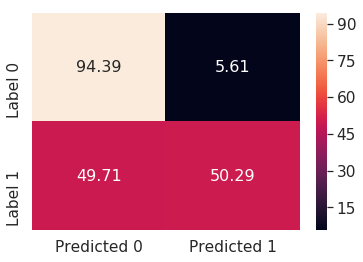

In [40]:
plot_confusion_matrix(dt_results)

## Tuning parameters - Decision Tree

In [28]:
print(dt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. (default: 10)
featuresCol: features column name. (default: features, current: features)
impurity: Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini (default: gini)
labelCol: label column name. (default: label, current: label)
maxBins: Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature. (default: 32)
maxDepth: Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 int

## Models - Random Forest Classifier

In [ ]:
from pyspark.ml.classification import RandomForestClassifier


rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label',
                            impurity = 'entropy', maxBins = 16, maxDepth = 8,
                            numTrees = 15)
rf_model = rf.fit(train_data)

rf_results = rf_model.transform(test_data)
rf_results.show()

## Model Evaluation - Random Forest Classifier

In [30]:
print("Testing set -RF- Area Under ROC: " + str(evaluator.evaluate(rf_results, {evaluator.metricName: "areaUnderROC"})))

Testing set -RF- Area Under ROC: 0.9003870310796324


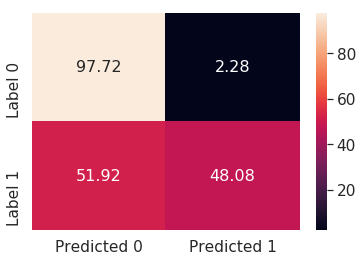

In [38]:
plot_confusion_matrix(rf_results)

## Tuning parameters - Random Forest

In [32]:
print(rf.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: auto, all, onethird, sqrt, log2, (0.0-1.0], [1-n]. (default: auto)
featuresCol: features column name. (default: features, current: features)
impurity: Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini (default: gini)
labelCol: label column name. (default: label, current: label)
maxBins: Max number of bins for discretizing continuous features.  Must 

## Interpretation

[Text(0,0.5,'Crime Count'),
 Text(0.5,0,'Month Of The Year'),
 Text(0.5,1,'Crime Trend By Month Of The Year'),
 None]

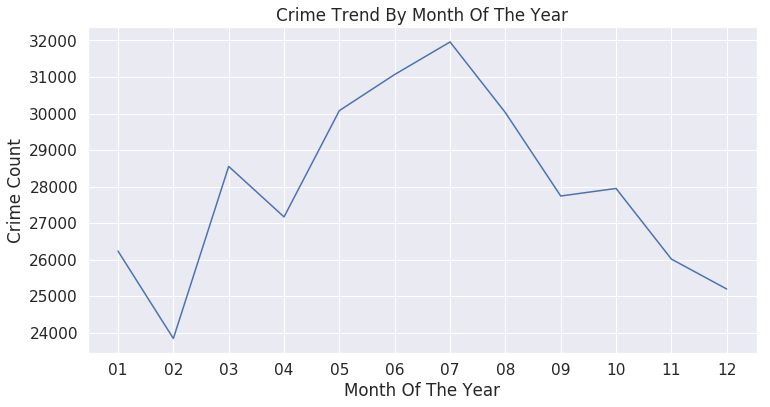

In [39]:
# Criminal Activities Trend
fig,ax = plt.subplots(nrows=1)
fig.set_size_inches(12,6)
monthAggregated = pd.DataFrame(df_crime_month.toPandas().groupby(["Month"])["RecordCount"].sum()).reset_index()

sn.lineplot(x = monthAggregated["Month"],
             y = monthAggregated["RecordCount"],
             data = monthAggregated,
             ax = ax)
ax.set(xlabel = 'Month Of The Year', ylabel='Crime Count',
        title = "Crime Trend By Month Of The Year",
        label = 'big')



[Text(0,0.5,'Crime Type'),
 Text(0.5,0,'Crime Count'),
 Text(0.5,1,'Crime Rate Across of Crime Type'),
 None]

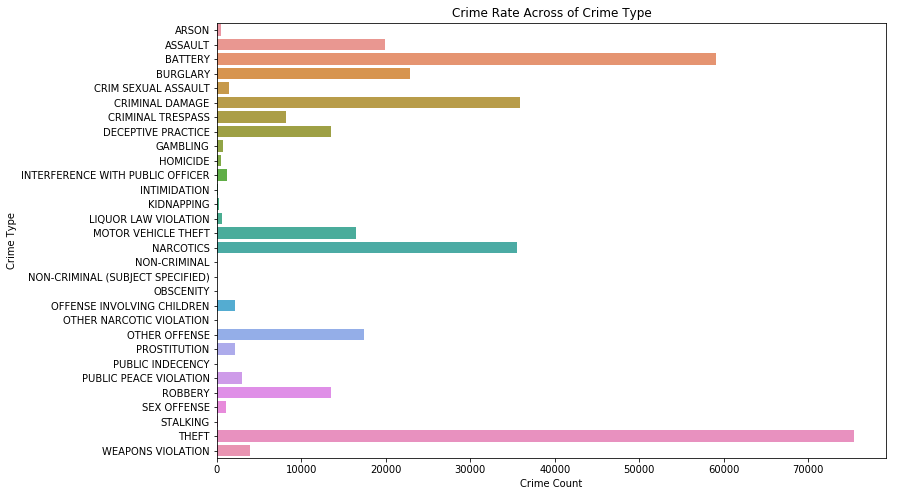

In [27]:
fig,ax = plt.subplots(nrows=1)
fig.set_size_inches(12,8)
typeAggregated = pd.DataFrame(df_crime_month.toPandas().groupby(["CrimeType"])["RecordCount"].sum()).reset_index()

sn.barplot(x = typeAggregated["RecordCount"],
             y = typeAggregated["CrimeType"],
             data = typeAggregated,
             ax = ax)
ax.set(xlabel = 'Crime Count', ylabel='Crime Type',
        title = "Crime Rate Across of Crime Type",
        label = 'big')

[Text(0,0.5,'Crime Count'),
 Text(0.5,0,'Month Of The Year'),
 Text(0.5,1,'THEFT By Month Of The Year'),
 None]

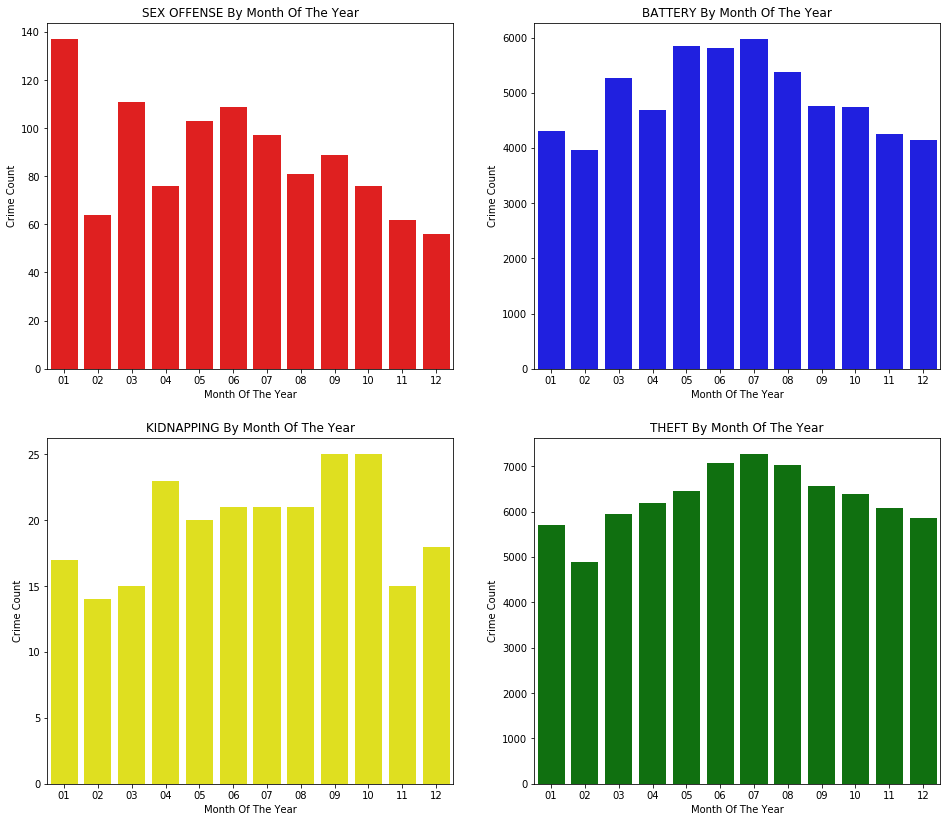

In [29]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(16, 14)
sexAggregated = pd.DataFrame(df_crime_month.where(df_crime_month['CrimeType'] == "SEX OFFENSE").
                             toPandas().groupby(["Month"])["RecordCount"].sum()).reset_index()
sn.barplot(x = sexAggregated["Month"],
             y = sexAggregated["RecordCount"],
             data = sexAggregated,
             color = "red",
             ax = axes[0][0])

batteryAggregated = pd.DataFrame(df_crime_month.where(df_crime_month['CrimeType'] == "BATTERY").
                             toPandas().groupby(["Month"])["RecordCount"].sum()).reset_index()
sn.barplot(x = batteryAggregated["Month"],
             y = batteryAggregated["RecordCount"],
             data = batteryAggregated,
             color = "blue",
             ax = axes[0][1])

kidnapAggregated = pd.DataFrame(df_crime_month.where(df_crime_month['CrimeType'] == "KIDNAPPING").
                             toPandas().groupby(["Month"])["RecordCount"].sum()).reset_index()
sn.barplot(x = kidnapAggregated["Month"],
             y = kidnapAggregated["RecordCount"],
             data = kidnapAggregated,
             color = "yellow",
             ax = axes[1][0])


theftAggregated = pd.DataFrame(df_crime_month.where(df_crime_month['CrimeType'] == "THEFT").
                             toPandas().groupby(["Month"])["RecordCount"].sum()).reset_index()
sn.barplot(x = theftAggregated["Month"],
             y = theftAggregated["RecordCount"],
             data = theftAggregated,
             color = "green",
             ax = axes[1][1])

axes[0][0].set(xlabel = 'Month Of The Year', ylabel='Crime Count',
        title = "SEX OFFENSE By Month Of The Year",
        label = 'small')
axes[0][1].set(xlabel = 'Month Of The Year', ylabel='Crime Count',
        title = "BATTERY By Month Of The Year",
        label = 'small')
axes[1][0].set(xlabel = 'Month Of The Year', ylabel='Crime Count',
        title = "KIDNAPPING By Month Of The Year",
        label = 'small')
axes[1][1].set(xlabel = 'Month Of The Year', ylabel='Crime Count',
        title = "THEFT By Month Of The Year",
        label = 'small')